In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34752_G')

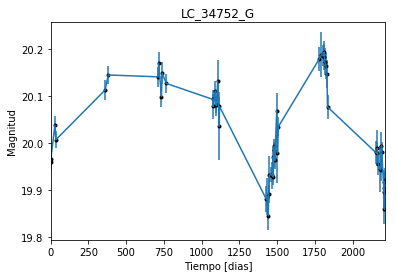

In [2]:
data = np.genfromtxt('LC_34752_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34752_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

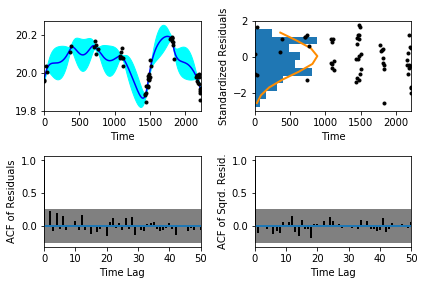

In [5]:
sample.assess_fit()

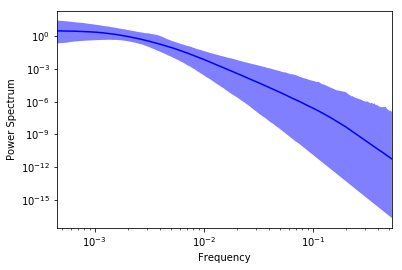

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34752_G')

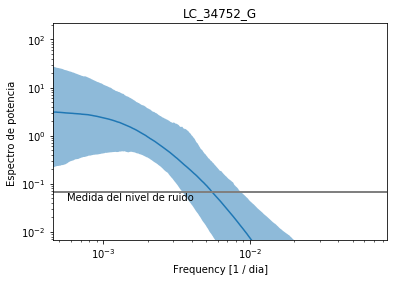

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34752_G')

Text(0.5,1,'Prediccion , valor esperado LC_34752_G')

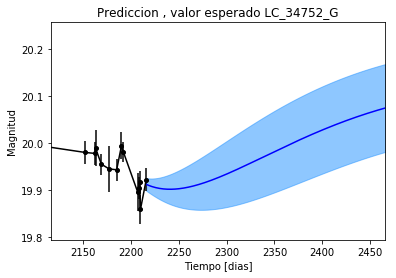

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34752_G')

Text(0.5,1,'LC_34752_G')

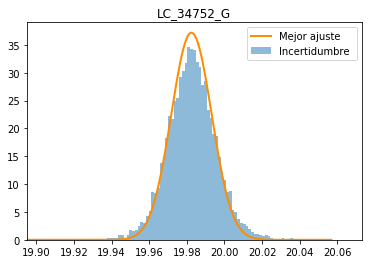

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34752_G')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_G')

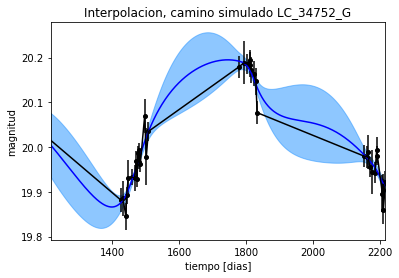

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_G')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_G')

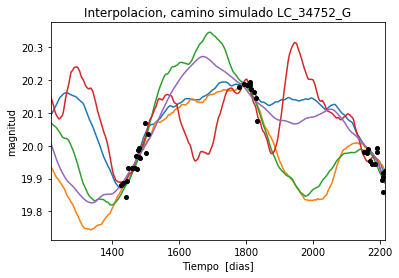

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 3153.17298387
Median: 0.0100172987355
Standard deviation: 0.214834089021
68% credibility interval: [ 0.00102383  0.24478759]
95% credibility interval: [  5.17474759e-04   8.35681139e-01]
99% credibility interval: [  4.64720886e-04   1.00290747e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 879.150119649
Median: 0.00183070982686
Standard deviation: 0.0823128666062
68% credibility interval: [ 0.00067909  0.01680675]
95% credibility interval: [ 0.00048414  0.27560186]
99% credibility interval: [  4.58127001e-04   5.84909321e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 479.81471135
Median: 0.0102811443647
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 759.203342883
Median: 129.834772779
Standard deviation: 1.63674453085
68% credibility interval: [ 128.01640587  131.00910229]
95% credibility interval: [ 125.53002603  131.85522666]
99% credibility interval: [ 123.39524588  132.20358419]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 596.374088152
Median: 0.562642300739
Standard deviation: 2.0566032848
68% credibility interval: [ 0.06525234  3.72327757]
95% credibility interval: [ 0.02186345  6.69075303]
99% credibility interval: [ 0.01481554  9.24433062]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 469.691755345
Median: 0.16360264133
Standard deviation: 8.80524185362
68% credibility interval: [ 0.00851425  5.82235308]
95% credibility interval: [  1.01829962e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 350.999401047
Median: 1.88887661032e-18
Standard deviation: 5.9412162754e+88
68% credibility interval: [  6.45321000e-66   2.30626538e+27]
95% credibility interval: [  1.39629091e-127   1.35264914e+083]
99% credibility interval: [  1.47466585e-133   2.27752155e+089]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4216.03781474
Median: 20.0452510018
Standard deviation: 0.0589516800245
68% credibility interval: [ 19.99857568  20.08408619]
95% credibility interval: [ 19.91123041  20.1443694 ]
99% credibility interval: [ 19.7943023   20.21012551]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 803.404532401
Median: 0.00151992051975
Standard deviation: 0.239736040352
68% credibility interval: [ 0.          0.23789092]
95% credibility interval: [ 0.          0.90569507]
99% credibility interval: [ 0.          1.03765443]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 803.404532401
Median: 0.00151992051975
Standard deviation: 0.239736040352
68% credibility interval: [ 0.          0.23789092]
95% credibility interval: [ 0.          0.90569507]
99% credibility interval: [ 0.          1.03765443]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1068.39898724
Median: 0.0
Standard deviation: 0.000871817528587
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 759.203342883
Median: 129.834772779
Standard deviation: 1.63674453085
68% credibility interval: [ 128.01640587  131.00910229]
95% credibility interval: [ 125.53002603  131.85522666]
99% credibility interval: [ 123.39524588  132.20358419]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2305.01764149
Median: 0.0129180078987
Standard deviation: 0.0214493984095
68% credibility interval: [ 0.00721176  0.02732205]
95% credibility interval: [ 0.00466429  0.06455578]
99% credibility interval: [ 0.00362793  0.1297227 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1936.31671362
Median: 0.982549200427
Standard deviation: 0.152946272218
68% credibility interval: [ 0.84544635  1.14280318]
95% credibility interval: [ 0.73924356  1.32788887]
99% credibility interval: [ 0.67956245  1.4816268 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 856.99164451
Median: 2.69550097784e-05
Standard deviation: 0.0655845730701
68% credibility interval: [  1.61475336e-31   2.69312027e-03]
95% credibility interval: [  1.24367866e-86   2.45430683e-02]
99% credibility interval: [  1.78589624e-94   1.59716354e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 3153.17298387
Median: (-0.0629405442323-0.0681232259678j)
Standard deviation: 2.0226300073
68% credibility interval: [-1.53804582+0.j         -0.00643294-1.73076742j]
95% credibility interval: [ -5.25073946e+00+0.j          -3.25138980e-03-6.50512488j]
99% credibility interval: [ -6.30145348e+00+0.j          -2.91992744e-03-0.00325481j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 879.150119649
Median: (-0.0115026890858+0.664005494868j)
Standard deviation: 1.59262049812
68% credibility interval: [-0.10559993+0.81564544j -0.00426682+0.j        ]
95% credibility interval: [-1.73165753+4.90925872j -0.00304191+0.j        ]
99% credibility interval: [ -3.67509365e+00 +1.46635208e+00j  -2.87849684e-03 +1.86017493e-05j]
Po